# **Flight Fare Prediction**

---



**Steps required :**
1. Importing Datasets
2. Exploratory Data Analysis(EDA)
3. Feauture Engineering
4. Feaute Scaling , if required
5. Feature Selection
6. Data Splitting
7. Hyperparameter Tuning
8. Model Training or Fitting
9. Pickle the model for deployment

**Importing Datasets**

In [8]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
train_df=pd.read_excel('D:\\flight-fare prediction\\Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
print(train_df.shape)

(10683, 11)


In [11]:
test_df=pd.read_excel('D:\\flight-fare prediction\\Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# **EDA**

In [12]:
#test datasets donot have 'Price' column in it so when it is appended with train datasets, the 'Price' column will have some NAn Values
final_df=train_df.append(test_df)
final_df.head()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_18720\1099769952.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


From info() we can see all independent variables are **categorical**

In [14]:
#Checking for missing values if any
dataset = final_df.copy()
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Price 0.2  % missing values


the 0.2 missing value for 'Price' is due to test datasets

In [15]:
# Select only the categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Check for missing values in each categorical column
missing_values_count = dataset[categorical_columns].isnull().sum()

# Print the missing values count for each categorical column
print(missing_values_count)


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
dtype: int64


# Moving on to do **Feature engineering**

In [16]:
##Fetaure Engineering Process
final_df['Journey_Day']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Journey_Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Journey_Yr']=final_df['Date_of_Journey'].str.split('/').str[2]

In [17]:
final_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Yr
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019


After Splitting '**Date_of_Journey**' to date,month and year columns , we can now drop 'Date_of_Journey' column

In [18]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

Similarly handling column '**Arrival_Time**'

In [19]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Yr,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15


Handling **'Dep_Time'**

In [21]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df.drop('Dep_Time',axis=1,inplace=True)

Handling **'Duration'**

In [22]:
final_df['Duration_hour'] = final_df['Duration'].apply(lambda x: 0 if 'h' not in x else int(x.split('h')[0]))
final_df['Duration_min'] = final_df['Duration'].apply(lambda x: 0 if 'm' not in x else int(x.split('m')[0].split()[-1]))
final_df.drop('Duration',axis=1,inplace=True)

In [23]:
final_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Yr,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,03,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,05,2019,13,15,05,50,7,25


In [24]:
#info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Total_Stops      13353 non-null  object 
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Journey_Day      13354 non-null  object 
 8   Journey_Month    13354 non-null  object 
 9   Journey_Yr       13354 non-null  object 
 10  Arrival_hour     13354 non-null  object 
 11  Arrival_min      13354 non-null  object 
 12  Dept_hour        13354 non-null  object 
 13  Dept_min         13354 non-null  object 
 14  Duration_hour    13354 non-null  int64  
 15  Duration_min     13354 non-null  int64  
dtypes: float64(1), int64(2), object(13)
memory usage: 1.7+ MB


we can still see the changed columns Dtype are **object** which has to converted to **int**

In [25]:
final_df['Journey_Day']=final_df['Journey_Day'].astype(int)
final_df['Journey_Month']=final_df['Journey_Month'].astype(int)
final_df['Journey_Yr']=final_df['Journey_Yr'].astype(int)
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Total_Stops      13353 non-null  object 
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Journey_Day      13354 non-null  int32  
 8   Journey_Month    13354 non-null  int32  
 9   Journey_Yr       13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dept_hour        13354 non-null  int32  
 13  Dept_min         13354 non-null  int32  
 14  Duration_hour    13354 non-null  int64  
 15  Duration_min     13354 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(6)
memory usage: 

Now handling other features

In [27]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
final_df.drop('Route',axis=1,inplace=True)

In [29]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [30]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Total_Stops      13353 non-null  object 
 4   Additional_Info  13354 non-null  object 
 5   Price            10683 non-null  float64
 6   Journey_Day      13354 non-null  int32  
 7   Journey_Month    13354 non-null  int32  
 8   Journey_Yr       13354 non-null  int32  
 9   Arrival_hour     13354 non-null  int32  
 10  Arrival_min      13354 non-null  int32  
 11  Dept_hour        13354 non-null  int32  
 12  Dept_min         13354 non-null  int32  
 13  Duration_hour    13354 non-null  int64  
 14  Duration_min     13354 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(5)
memory usage: 1.3+ MB


In [32]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Yr,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [33]:
final_df["Airline"].value_counts()


Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

# Handling Categorical Data
Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case


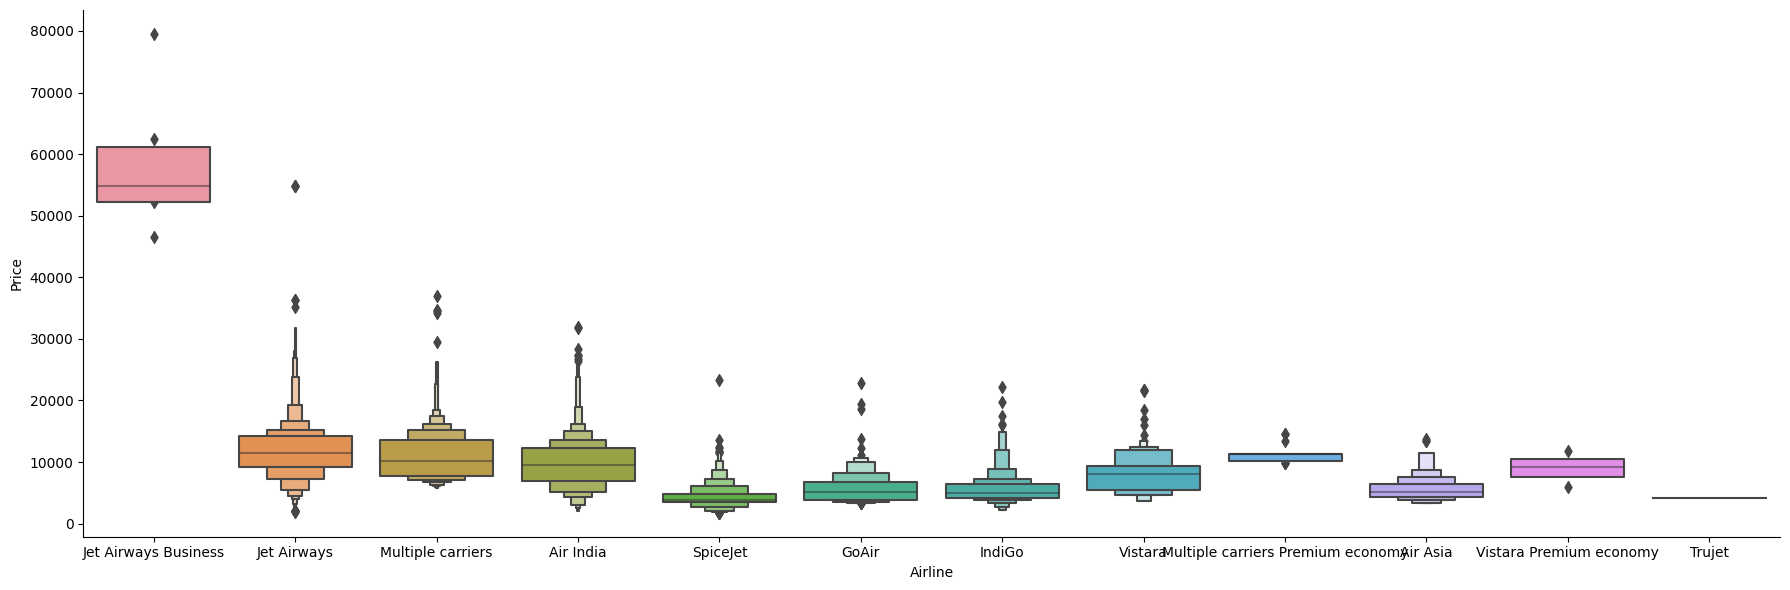

In [34]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = final_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


**Airline** is Nominal Categorical data we will perform OneHotEncoding


In [35]:
Airline = final_df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [36]:
final_df["Source"].value_counts()


Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

**Source vs Price**

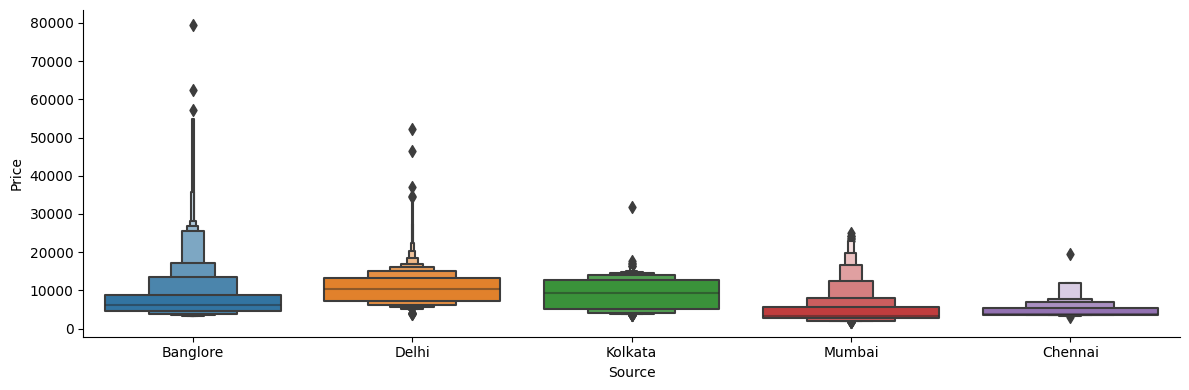

In [37]:
sns.catplot(y = "Price", x = "Source", data = final_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

**Source** is Nominal Categorical data we will perform OneHotEncoding

In [38]:

Source = final_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [39]:
final_df["Destination"].value_counts()


Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

**Destination** is Nominal Categorical data we will perform OneHotEncoding


In [40]:

Destination = final_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [41]:
final_df["Total_Stops"].value_counts()


1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In this case of **Ordinal** Categorical type we perform **LabelEncoder**


In [42]:
# Here Values are assigned with corresponding keys

final_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [43]:
final_df.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Yr,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [44]:
final_df.shape

(13354, 15)

In [45]:
df = pd.concat([final_df, Airline, Source, Destination], axis = 1)

In [46]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Yr,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df.shape

(13354, 35)

In [48]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [49]:
df.head()

,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Yr,Arrival_hour,Arrival_min,Dept_hour,Dept_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,No info,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2.0,No info,7662.0,1,5,2019,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2.0,No info,13882.0,9,6,2019,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1.0,No info,6218.0,12,5,2019,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,No info,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap
2. feature_importance_
3. SelectKBest



In [50]:
# Since we combined the train and test datasets into df
# Splitting them back into train and test
train_df = df[df['Price'].notnull()]
test_df = df[df['Price'].isnull()]

In [51]:
train_df.shape
train_df = train_df.dropna() # removing row having NaN value , if any

In [52]:
X = train_df.drop(columns=['Price','Additional_Info'])
y = train_df['Price']


In [53]:
X

,Total_Stops,Journey_Day,Journey_Month,Journey_Yr,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,2019,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,2019,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,2019,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,2019,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,2019,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,9,4,2019,22,25,19,55,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,27,4,2019,23,20,20,45,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,27,4,2019,11,20,8,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,1,3,2019,14,10,11,30,2,40,...,0,0,0,0,0,0,0,0,0,1


In [54]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

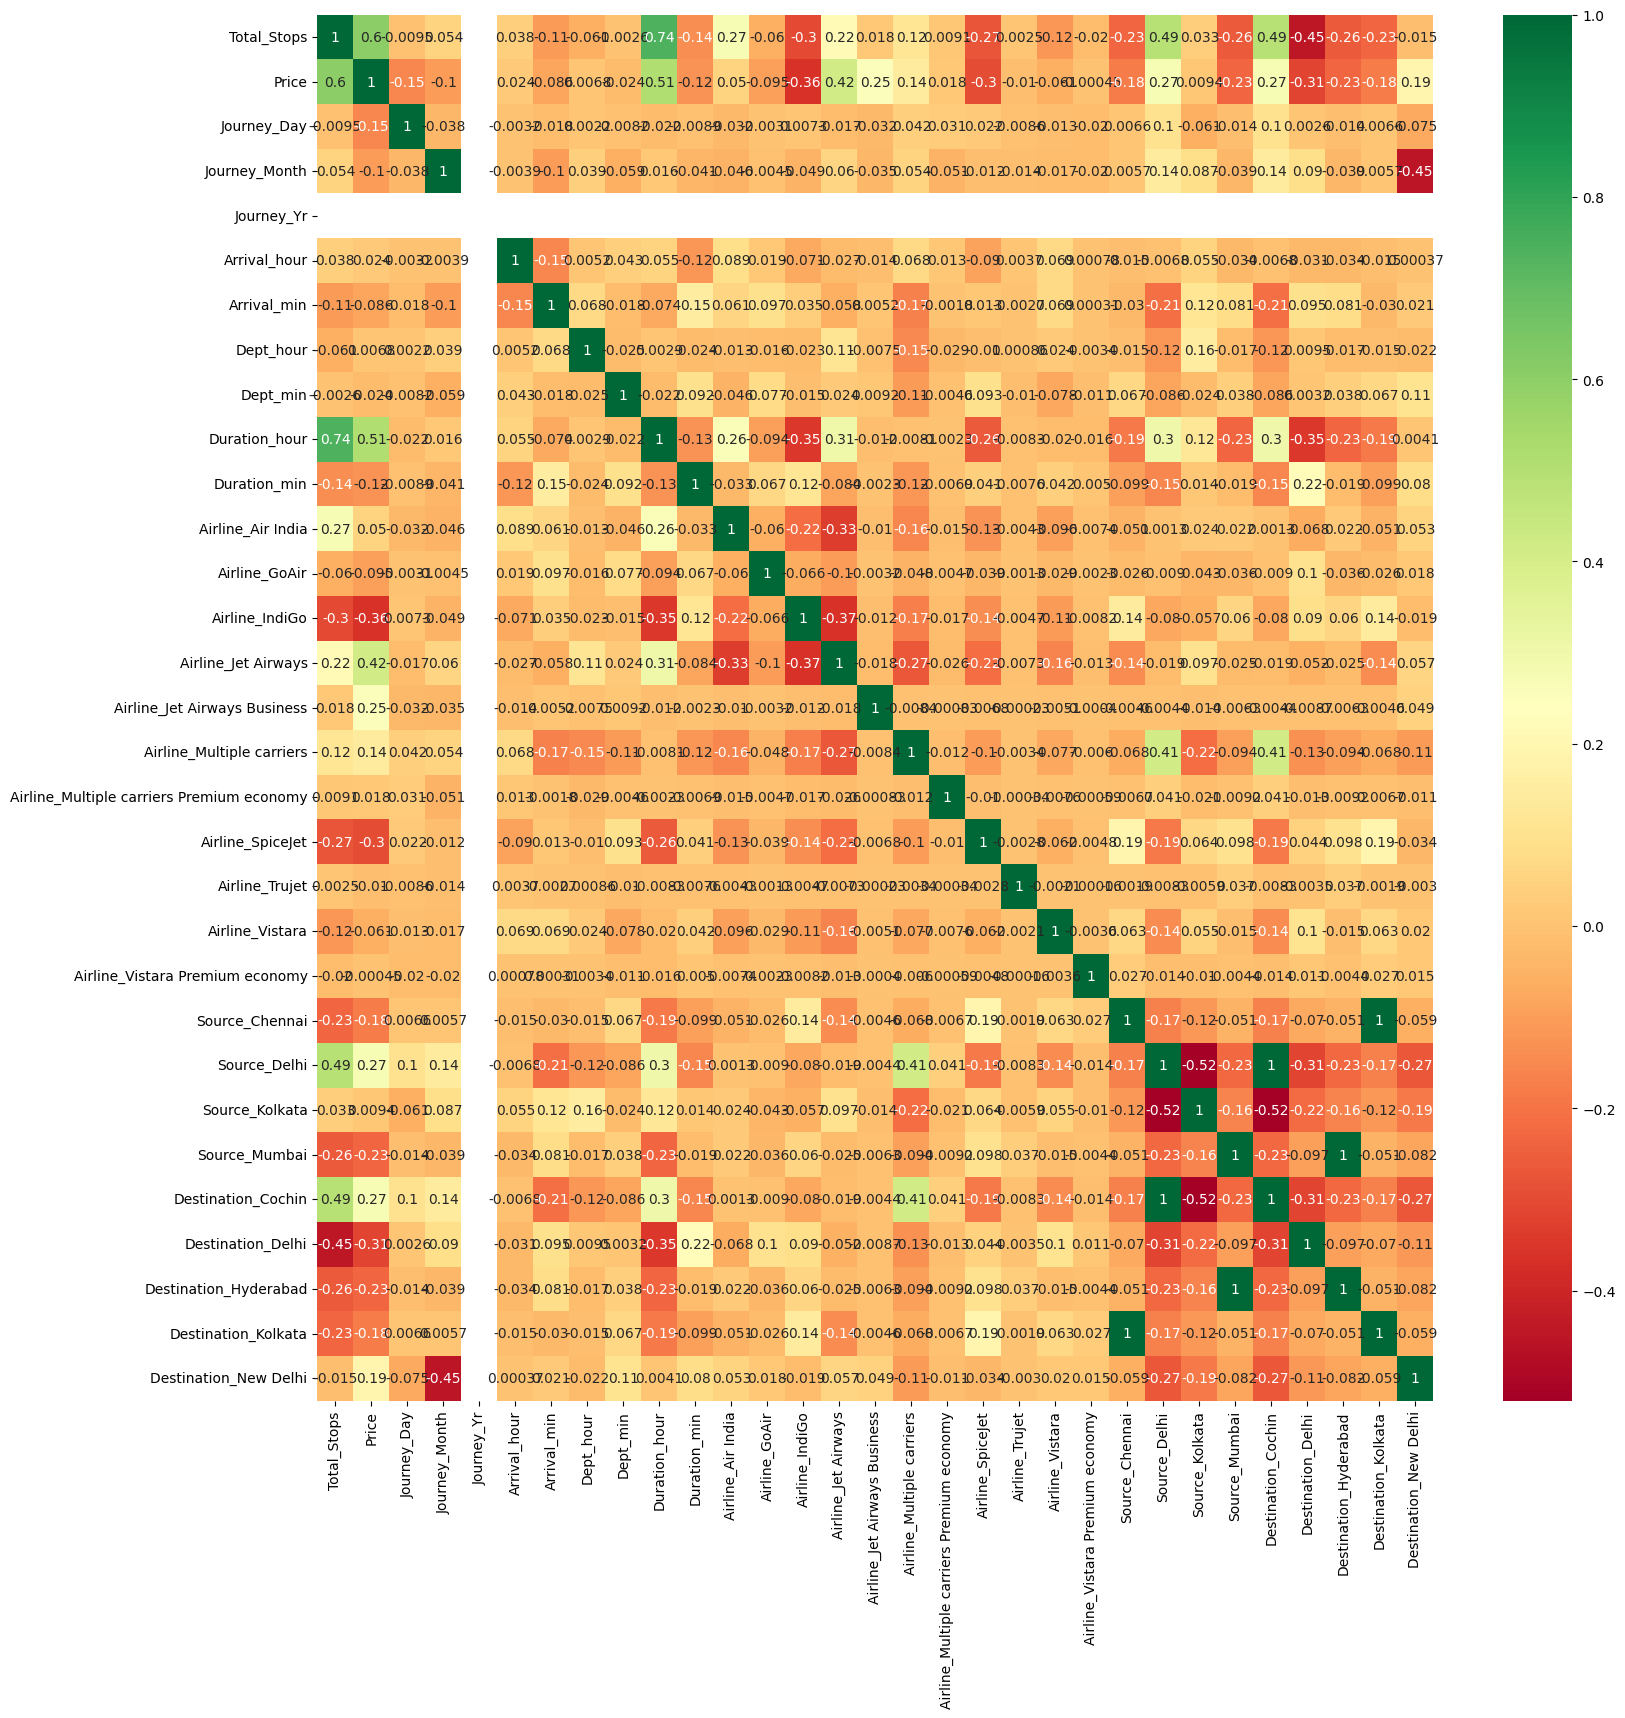

In [55]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

Selecting important feature using **ExtraTreesRegressor**

In [56]:
# Important feature using ExtraTreesRegressor as it is a feature selection method
# this is to see important features
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [57]:
print(selection.feature_importances_)


[2.19658591e-01 1.42803223e-01 5.37308160e-02 0.00000000e+00
 2.72286778e-02 1.97701277e-02 2.42685312e-02 2.17331037e-02
 1.30212632e-01 1.75572164e-02 9.58528170e-03 1.98570989e-03
 1.93152784e-02 1.38446986e-01 6.77270046e-02 1.89270956e-02
 8.75439815e-04 3.15975496e-03 9.94490185e-05 4.87436735e-03
 8.18594814e-05 4.94842819e-04 1.34124840e-02 3.25304474e-03
 6.91491367e-03 9.46505390e-03 1.24989223e-02 6.10059433e-03
 6.32868011e-04 2.51861307e-02]


Plot graph of feature importances for better **visualization**


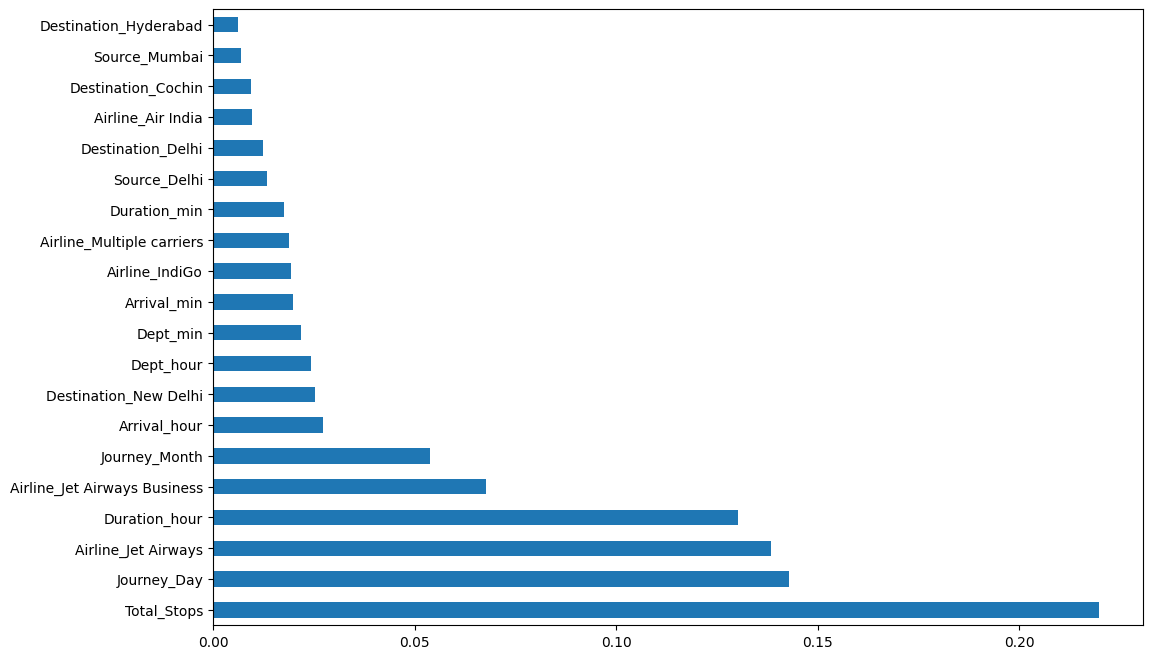

In [58]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [59]:
feat_importances


Total_Stops                                  0.219659
Journey_Day                                  0.142803
Journey_Month                                0.053731
Journey_Yr                                   0.000000
Arrival_hour                                 0.027229
Arrival_min                                  0.019770
Dept_hour                                    0.024269
Dept_min                                     0.021733
Duration_hour                                0.130213
Duration_min                                 0.017557
Airline_Air India                            0.009585
Airline_GoAir                                0.001986
Airline_IndiGo                               0.019315
Airline_Jet Airways                          0.138447
Airline_Jet Airways Business                 0.067727
Airline_Multiple carriers                    0.018927
Airline_Multiple carriers Premium economy    0.000875
Airline_SpiceJet                             0.003160
Airline_Trujet              

Splitting Datasets and applying Random Forrest , to check accuracy  

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = reg_rf.predict(X_test)

In [63]:
reg_rf.score(X_test, y_test)

0.7970350960193319

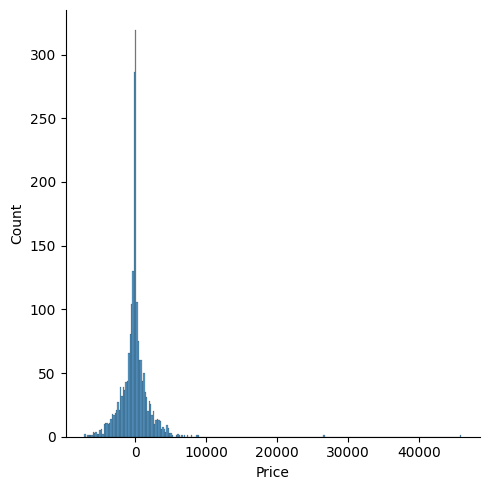

In [64]:
sns.displot(y_test-y_pred)
plt.show()
#gaussian distribution is formed between tested and predicted results , it is a good indicator

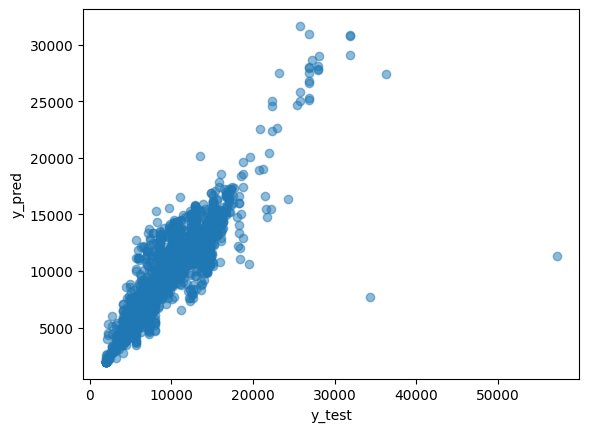

In [65]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()
#using scatter plot to see the results


In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1178.5043136503439
MSE: 4376340.691459255
RMSE: 2091.970528343852


In [67]:
metrics.r2_score(y_test, y_pred)
#useful tool for model evaluation and comparison

0.7970350960193319


#**Hyperparameter Tuning**

In [68]:
from sklearn.model_selection import RandomizedSearchCV


In [69]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [70]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [71]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

MODEL TRAINING

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Anuj\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Anuj\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Anuj\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Anuj\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

<Figure size 800x800 with 0 Axes>

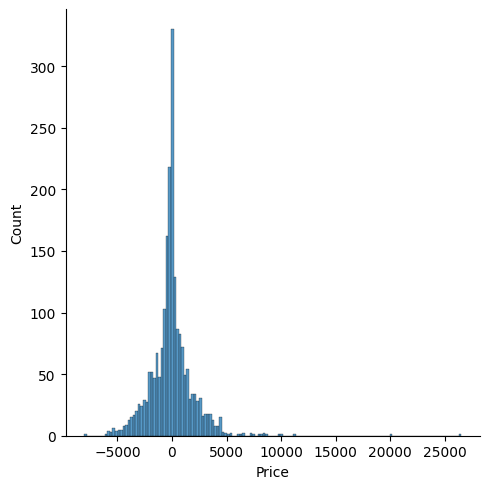

In [74]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

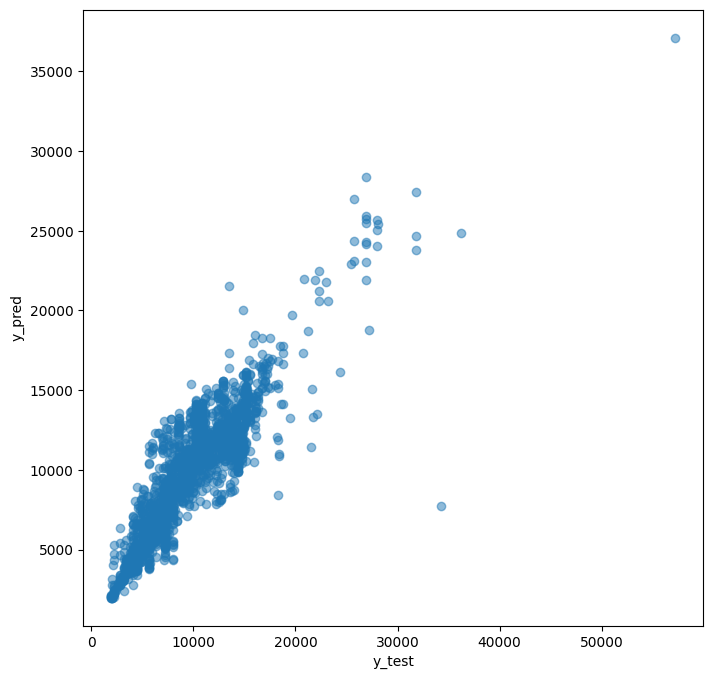

In [75]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1265.3304640096999
MSE: 3922818.704025022
RMSE: 1980.6106896674628


**Pickling the model for deployment**

In [77]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [85]:
import pickle

# Save the object to a pickle file
with open('flight_rf.pkl', 'wb') as model:
    pickle.dump(rf_random, model)

In [86]:
model = open('flight_rf.pkl','rb')
forest =pickle.load(model)

In [87]:
prediction = rf_random.predict(X_test)


In [88]:
metrics.r2_score(y_test, prediction)


0.8180684325720256